In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import utils.dimension_reduction as dr
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
from tabulate import tabulate
import utils.eval_metrics as em
from sklearn import tree
from sklearn import metrics
import utils.learning_curve as lc
import utils.cross_validation as cv
import utils.oversampling as osm
import pickle

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("processed_data.csv")

In [3]:
data.head()

,Gender,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Diabetes,Difficulty Hearing,Difficulty Seeing,Hepatitis_B,Hepatitis_C,hospitalized,Weak Kidney,Kidney Stone,Pesticide_used,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,HC2,HC3,HC4,HC5,days_hospitalised_1,days_hospitalised_2,days_hospitalised_3,days_hospitalised_4,days_hospitalised_5,days_hospitalised_6,Age,Env_Subsamp_B_wts_x,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Env_Subsamp_B_wts_y,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,surplus specimen_B_2y_wts,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,surplus specimen_GLYP_2y_wts,Glyphosate,UACR
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,-0.108628,-0.518634,-0.190293,-0.140932,-0.07757,0.543686,1.021701,0.071507,-0.021614,-0.121833,-0.518634,-0.256235,0.382072,-0.290586,-0.082660,-0.227729,-0.119027,-0.495505,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.348441,-0.359301,-0.346669,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.556004,-0.502088,-0.135787,-0.537448,-0.07757,-0.283344,-0.132227,2.774817,-0.183337,-0.121833,-0.502088,-0.381923,0.308823,-0.315169,-0.239351,-0.253029,-0.119027,-0.404546,0.413754,-0.057047,-0.097582,-0.023447,0.241930,0.764528,-0.794029,-0.442560,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.137026,-0.197805,0.022777,-0.245279,-0.07757,1.175124,0.077578,0.071507,0.715355,-0.121833,-0.197805,-0.335284,-0.223603,-0.251700,-0.165348,-0.155442,-0.119027,-0.136210,-0.127305,-0.057047,-0.097582,-0.023447,0.102132,-0.348441,-0.017631,0.043225,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.556004,-0.784983,-0.120921,-0.500927,-0.07757,-0.258703,-0.132227,-0.251571,-0.183337,-0.121833,-0.784983,0.011214,-0.030093,0.180716,0.723454,-0.107733,-0.119027,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,-1.594093,-0.785710,-0.185338,-0.819183,-0.07757,-0.263323,-0.132227,-0.508715,-0.183337,-0.121833,-0.785710,-0.416705,-0.450130,-0.283805,-0.239351,-0.253029,-0.119027,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0


### Data preparation

In [4]:
y = data['UACR']
X = data.drop(columns=['UACR'])

In [5]:
X.shape, y.shape

((6221, 80), (6221,))

### p-significant features

In [6]:
X_significant = dr.get_p_values_significant_features(X,y)

**************************************************
significant features
**************************************************
                       Feature_name       p-Value
0                          Diabetes  1.835453e-38
1                       Weak Kidney  1.719359e-24
2                      heart attack  5.844099e-22
3                      Kidney Stone  3.060326e-14
4          congestive heart failure  1.888667e-10
5                         emphysema  8.199856e-09
6               days_hospitalised_5  1.873313e-07
7                        Chest_pain  3.370932e-05
8                            stroke  3.863883e-05
9                               Age  6.562183e-05
10                            const  9.813391e-05
11                 para-Nitrophenol  1.920579e-04
12              High_Blood_pressure  2.065908e-04
13                             gout  2.447367e-04
14                        arthritis  2.755482e-04
15          Dimethyldithiophosphate  3.307510e-04
16                         

### Oversampling

In [7]:
X_os,y_os = osm.oversample_data(X_significant, y, method='smotenc', sampling_strategy=0.75)

In [8]:
X_os.shape, y_os.shape

((8942, 36), (8942,))

### Train test split

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=2)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [11]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (5722, 36) (5722,)
validation data(X_valid,y_valid) shape:  (1431, 36) (1431,)
test data(X_test,y_test) shape:  (1789, 36) (1789,)


### SVC Baseline

In [12]:
from sklearn.svm import SVC

In [13]:
# Train classifier

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [14]:
# Predict the model

y_pred_baseline_svm = svc_model.predict(X_valid)

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       825
           1       0.80      0.73      0.76       606

    accuracy                           0.81      1431
   macro avg       0.81      0.80      0.80      1431
weighted avg       0.81      0.81      0.81      1431

Confusion Matrix:
 [[715 110]
 [166 440]]


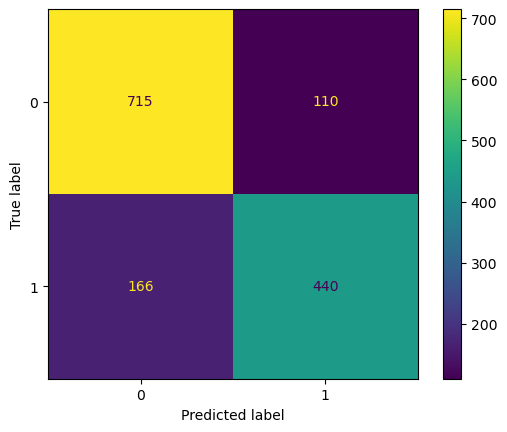

Accuracy: 0.8071278825995807
Precision: 0.8
Recall: 0.7260726072607261
Sensitivity: 0.7260726072607261
Specificity: 0.8666666666666667
F1-Score: 0.7612456747404844
Cohen Kappa Score: 0.6000996318481708
G_measure: 0.7612456747404844
Informedness/Youdens statistic: 0.5927392739273927
PPV: 0.8
NPV: 0.811577752553916
Markedness: 0.6115777525539161
Matthews Correlation Coefficient 0.6020848387054393
ROC-AUC Score: 0.7963696369636963


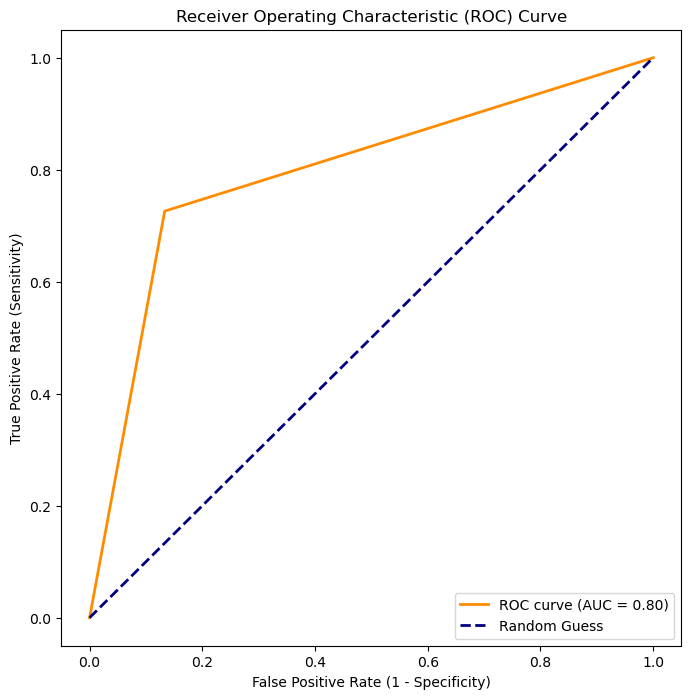

In [15]:
em.metrics_calculation(y_valid, y_pred_baseline_svm, True)

In [16]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train_full)

### Hyperparameter tuning

In [18]:
# defining a grid search like function for decision tree to get hyper parameters

def svm_grid_search(C, kernel, params, X_train, X_test, y_train, y_test):
    for k in range(0,len(C)):
        for i in range(0, len(kernel)):
            C_val = C[k]
            kernel_val = kernel[i]
        
        svc_model = SVC(C = C_val, kernel = kernel_val, random_state=2023)
        svc_model = svc_model.fit(X_train,y_train)
        y_pred = svc_model.predict(X_test)
        
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        
        parameters_dict = {'Regularization_parameter':C_val, 'Kernel':kernel_val, 'accuracy': accuracy, 'F1_score':F1_score, 'precision':precision, 'recall':recall}
        params.append(parameters_dict)
        
        print(f'Regularization_parameter:{C_val}, Kernel:{kernel_val}, accuracy:{accuracy}, F1_score:{F1_score}')

In [19]:
C = [1, 10, 100]
kernel = ['linear','rbf']
params = list()

In [20]:
svm_grid_search(C, kernel, params, X_train, X_valid, y_train, y_valid)

Regularization_parameter:1, Kernel:rbf, accuracy:0.8071278825995807, F1_score:0.7997318643339
Regularization_parameter:10, Kernel:rbf, accuracy:0.8819007686932215, F1_score:0.8774740003556631
Regularization_parameter:100, Kernel:rbf, accuracy:0.8986722571628232, F1_score:0.8962647926220743


In [21]:
# lets sort the metrics in descending order

param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
df = pd.DataFrame.from_dict(param_sorted)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

# optimal set of hyperparameters will be the top value in the sorted parameter list

opt_hparams = param_sorted[0]
print('**'*60)
print(f'\noptimal hyper-parameters: {opt_hparams}\n')
print('**'*60)

+----+----------------------------+----------+------------+------------+-------------+----------+
|    |   Regularization_parameter | Kernel   |   accuracy |   F1_score |   precision |   recall |
|----+----------------------------+----------+------------+------------+-------------+----------|
|  0 |                        100 | rbf      |   0.898672 |   0.896265 |    0.896179 | 0.896352 |
|  1 |                         10 | rbf      |   0.881901 |   0.877474 |    0.884347 | 0.873264 |
|  2 |                          1 | rbf      |   0.807128 |   0.799732 |    0.805789 | 0.79637  |
+----+----------------------------+----------+------------+------------+-------------+----------+
************************************************************************************************************************

optimal hyper-parameters: {'Regularization_parameter': 100, 'Kernel': 'rbf', 'accuracy': 0.8986722571628232, 'F1_score': 0.8962647926220743, 'precision': 0.8961788838950113, 'recall': 0.896351

### Cross validation

In [22]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation

svm_model_tuned = SVC(C = 100, kernel = 'rbf', random_state=2023)
svm_model_tuned.fit(X_train_full, y_train_full)
cv.cross_validation_func(svm_model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.9422967766885314,
 'Mean Train Precision': 0.947366226280186,
 'Mean Train Recall': 0.9166119311964385,
 'Mean Train F1 Score': 0.9317331987255699,
 'Mean Valid Accuracy': 90.94065961990492,
 'Mean Valid Precision': 0.9030031983070217,
 'Mean Valid Recall': 0.8841423691109874,
 'Mean Valid F1 Score': 0.8933737296518232}

### Testing SVM with optimal hyperparameters on unseen data

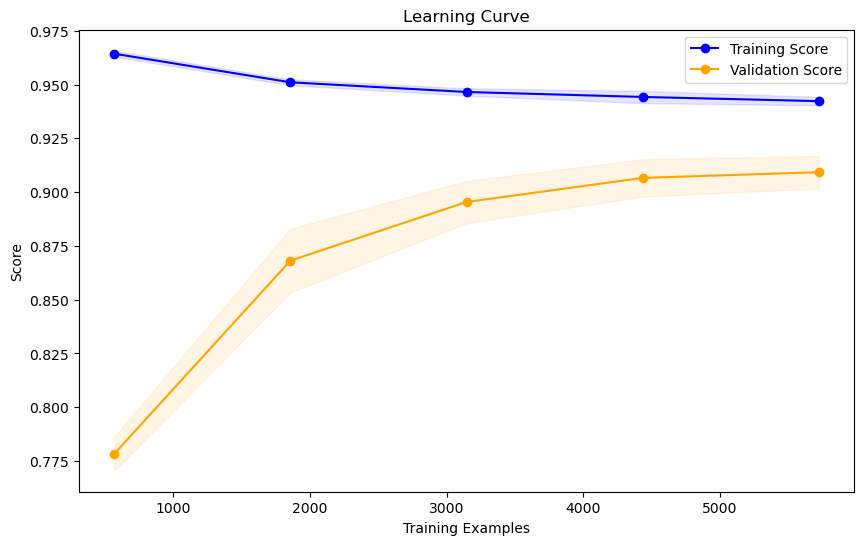

In [23]:
svc_model_opt_p_smote = SVC(C = 100, kernel = 'rbf', random_state=2023)
svc_model_opt_p_smote.fit(X_train_full, y_train_full)
y_pred_opt_SVC = svc_model_opt_p_smote.predict(X_test)
lc.plot_learning_curve(svc_model_opt_p_smote, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1030
           1       0.91      0.88      0.89       759

    accuracy                           0.91      1789
   macro avg       0.91      0.91      0.91      1789
weighted avg       0.91      0.91      0.91      1789

Confusion Matrix:
 [[964  66]
 [ 91 668]]


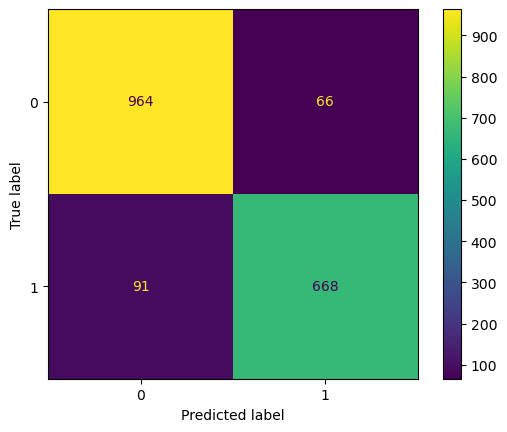

Accuracy: 0.9122414756847401
Precision: 0.9100817438692098
Recall: 0.8801054018445322
Sensitivity: 0.8801054018445322
Specificity: 0.9359223300970874
F1-Score: 0.8948425987943738
Cohen Kappa Score: 0.8195790629928088
G_measure: 0.8948425987943738
Informedness/Youdens statistic: 0.8160277319416196
PPV: 0.9100817438692098
NPV: 0.9137440758293839
Markedness: 0.8238258196985937
Matthews Correlation Coefficient 0.8199175050964512
ROC-AUC Score: 0.9080138659708097


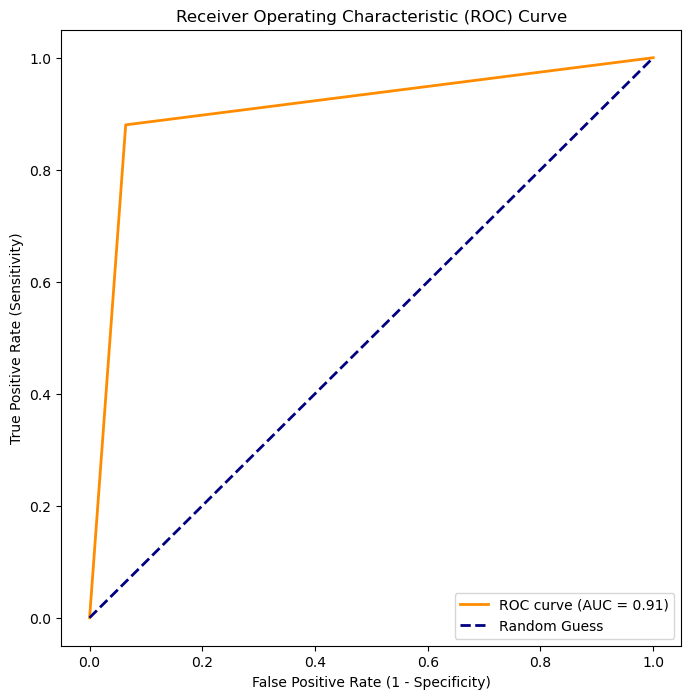

In [24]:
em.metrics_calculation(y_test, y_pred_opt_SVC, True)

In [25]:
filename = 'svc_model_opt_p_smote.sav'
pickle.dump(svc_model_opt_p_smote, open(filename, 'wb'))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1030
           1       0.91      0.88      0.89       759

    accuracy                           0.91      1789
   macro avg       0.91      0.91      0.91      1789
weighted avg       0.91      0.91      0.91      1789

Confusion Matrix:
 [[964  66]
 [ 91 668]]


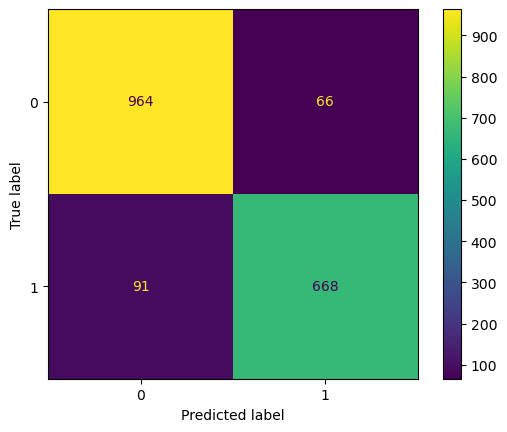

Accuracy: 0.9122414756847401
Precision: 0.9100817438692098
Recall: 0.8801054018445322
Sensitivity: 0.8801054018445322
Specificity: 0.9359223300970874
F1-Score: 0.8948425987943738
Cohen Kappa Score: 0.8195790629928088
G_measure: 0.8948425987943738
Informedness/Youdens statistic: 0.8160277319416196
PPV: 0.9100817438692098
NPV: 0.9137440758293839
Markedness: 0.8238258196985937
Matthews Correlation Coefficient 0.8199175050964512
ROC-AUC Score: 0.9080138659708097


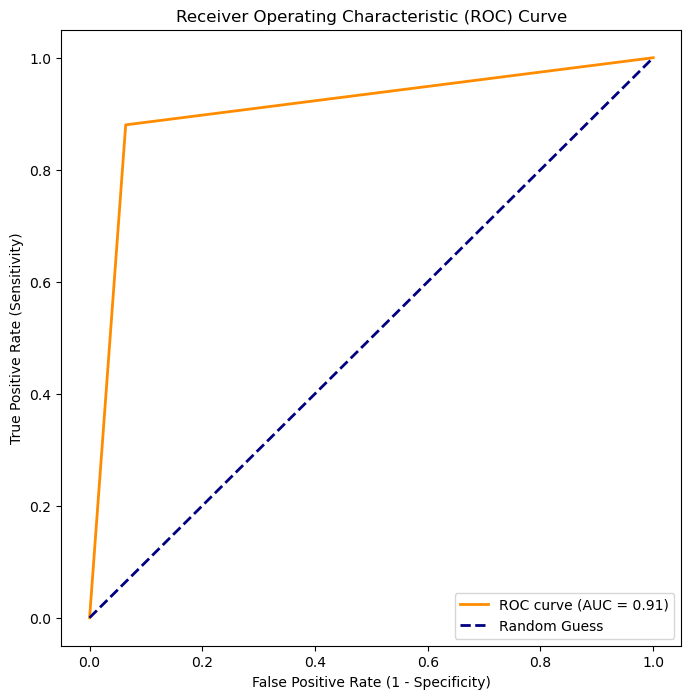

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
em.metrics_calculation(y_test, y_pred, True)